<h1>GAN - Generative Adversarial Network</h1>

Ein GAN ist ein Netzwerk, das aus zwei verschiedenen Komponenten besteht. Das Ziel ist es Bilder zu generieren.

Ein GAN besteht aus:<br>
- Einem Generator, der ein Bild erzeugen soll. Durch Anpassung der Weights kann das Model in eine Richtung gelenkt werden, das am Ende ein Vektor ausgibt das als Bild angezeigt werden kann. Quasi das Gegenteil von einem CNN.
- Ein Discriminator, der das Generatornetz evaluiert.

Beide können aus einem ANN oder CNN erstellt werden. Je umfangreicher das Netz ist, desto mehr Features kann es besser Abdecken.

Ein einfaches Netz kann aus zwei ANNs erstellt werden. 

GANs können in verschiedene Use-Cases eingesetzt werden. Um ein erstes einfaches Beispiel zu erstellen, ist die Aufgabe synthetische Bilder von einem Produkt herzustellen was für eine Qualitätskontrolle genutzt werden kann.

<i>Abb1</i>: [Coming soon]

<img>

Als Komponente haben wir ein 20 x 20 Bild mit einem "L" darauf. Das L könnte ein L-förmiges Bauteil sein. Bei der Produktion werden viele dieser Komponenten hergestellt.Mit der Synthetisierung dieser Bilder können wir mehr Daten generieren, die für das Training eines CNN verwendet werden können, um Abweichungen besser abzudecken. 

Wir gehen davon aus das es viel mehr Bilder von guten Bauteilen gibt und sehr wenige von nicht guten Bauteilen. Mit den synthetischen Bildern kann die Lücke geschlossen werden.

In [57]:
# Imports.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

<h2> Dataset </h2>

Um so ein Bild zu erstellen, kann ein Zeichenprogramm oder Numpy verwendet werden.

<i>Abb2</i>: Zeichnung L-Objekt.

<img src="./data/img/1_gan.PNG" width=400, height=400>

Alternativ kann auch mit Numpy eine einfache Form gezeichnet werden.

In [48]:
# Erstelle 1 Sample. 
def create_image(color:int=1) -> np.array:
    image = np.zeros((20, 20))  # 2D Matrix, 20x20 Pixel.
    # img [yloc, xloc]
    image[1:12, 7] = 1  # Zeichne Feld.
    image[1:12, 8] = 1  # Zeichne Feld.

    image[11, 9:15]  = 1  
    image[12, 7:15] = 1  

    return image

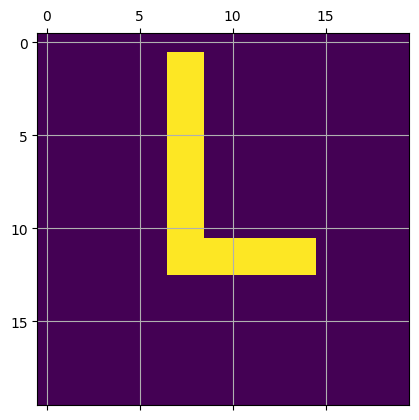

In [49]:
img = create_image()
plt.matshow(img)
plt.grid()

Schnell und einfach ist das Bild erstellt. 

<h3>Numpy Dataset</h3>

In [67]:
# Erstelle Dataset aus n-Samples 
def numpy_dataset(n:int):
    return np.array([create_image() for x in range(n)])
    
size = 950
dataset_numpy = numpy_dataset(size)
dataset_numpy.shape

(950, 20, 20)

In [68]:
dataset_numpy = dataset_numpy.reshape(size, 20, 20, 1).astype('float')

In [69]:
# Dann können die Daten normalisiert werden.
dataset_numpy_scaled = ( dataset_numpy - 0.5 ) / 0.5

<h2>GAN Model - ANN</h2>

In [80]:
# Generator ANN #
gen_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=(100,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=20*20, activation='tanh'),
    tf.keras.layers.Reshape((20, 20, 1))
])

gen_ann.compile(
    optimizer = 'adam',
    loss      = 'binary_crossentropy'
)

# Discriminator ANN # 
dic_ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20,20, 1)),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(450, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dic_ann.compile(
    optimizer = 'adam',
    loss      = 'binary_crossentropy',
    metrics   = 'accuracy'
)